# Import libraries and dataset

In [69]:
# computation libraries
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import pandas as pd 
import numpy as np 
from scipy import stats

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [70]:
# data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
# tensorflow
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras import layers
# from tensorflow.keras.layers.experimental import preprocessing

In [46]:
# import dataset
path = "C:\\Users\\daeni\\Desktop\\LOVE\\Academics\\JeepNi\\ML Model for Sale Prediction\\Dataset\\taxi_fare_combined.csv"

In [47]:
# convert csv to dataframe
df = pd.read_csv(path)

# Data Exploration

In [49]:
df.head()

,trip_duration,distance_traveled,total_fare
0,748.0,2.75,105.300
1,1187.0,3.43,142.200
2,730.0,3.12,97.875
3,671.0,5.63,99.750
4,329.0,2.09,70.200


In [50]:
df.columns

Index(['trip_duration', 'distance_traveled', 'total_fare'], dtype='object')

In [51]:
df.shape

(208915, 3)

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
trip_duration,208915.0,951.929158,2285.625050,1.000,445.00,705.0,1093.00,86387.00
distance_traveled,208915.0,4.775495,5.051035,0.020,1.95,3.2,5.73,315.25
total_fare,208915.0,127.852180,98.047952,1.125,70.20,101.7,152.25,3969.75


# Data Wrangling

In [48]:
df = df.drop("Unnamed: 0", axis=1)

# Dataset Splitting

In [59]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_data.index)

In [60]:
print(f"Dataframe Shape: {df.shape}\nTrain Dataset Frame: {train_data.shape}\nTest Dataset Frame: {test_data.shape}\n")

Dataframe Shape: (208915, 3)
Train Dataset Frame: (167132, 3)
Test Dataset Frame: (41783, 3)



In [62]:
# Split features from labels 
train_features = train_dataset.copy()
train_target = train_features.pop('total_fare')

test_features = test_dataset.copy()
test_target = test_features.pop('total_fare')

# Normalizing Data

In [66]:
# Normalize
print(train_dataset.describe().transpose()[['mean', 'std']])

                         mean          std
trip_duration      952.023652  2297.948984
distance_traveled    4.767948     5.049129
total_fare         127.808896    98.479246


In [92]:
# Normalization 
layer = layers.Normalization()

# adapt to data
layer.adapt(np.array(train_features))

print(f"Features mean: {normalized_data.numpy().mean()}")
print(f"Features std: {normalized_data.numpy().std()}")

Features mean: 1.5520631446719335e-09
Features std: 1.0


In [91]:
first = np.array(train_features[:1])
print('First example:', first)
print('Normalized:', layer(first).numpy())

First example: [[912.     7.39]]
Normalized: [[-0.017  0.519]]


# Model Building

In [125]:
feature = 'distance_traveled'
single_feature = np.array(train_features[feature])
print(single_feature.shape, train_features.shape)

single_feature = single_feature.reshape(-1, 1)  # Assuming you want each sample to have one feature

(167132,) (167132, 2)


In [126]:
# normalization 
single_feature_layer = layers.Normalization()

# adapt to data 
single_feature_layer.adapt(single_feature)

In [127]:
# sequential model 
single_feature_model =  keras.models.Sequential([
    single_feature_layer,
    layers.Dense(units=1) # linear model
])

In [128]:
single_feature_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_14                │ ?                      │             3 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (16.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3 (16.00 B)

In [129]:
# define loss and optimizer
loss = keras.losses.MeanAbsoluteError() #mse
optim = keras.optimizers.Adam(learning_rate=0.25) #learning rate = 0.1 

single_feature_model.compile(optimizer=optim, loss=loss) 

In [130]:
history = single_feature_model.fit(
    train_features[feature], train_target, 
    epochs = 100, 
    verbose = 1, 
    # calculate validation results on 20% of training data 
    validation_split = 0.2) 

Epoch 1/100
4179/4179 ━━━━━━━━━━━━━━━━━━━━ 5s 957us/step - loss: 44.6533 - val_loss: 23.6889
Epoch 2/100
4179/4179 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 23.7040 - val_loss: 23.6686
Epoch 3/100
4179/4179 ━━━━━━━━━━━━━━━━━━━━ 3s 772us/step - loss: 23.5744 - val_loss: 23.6885
Epoch 4/100
4179/4179 ━━━━━━━━━━━━━━━━━━━━ 3s 660us/step - loss: 23.6665 - val_loss: 23.6790
Epoch 5/100
4179/4179 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 23.7206 - val_loss: 23.6645
Epoch 6/100
4179/4179 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 23.3968 - val_loss: 23.6833
Epoch 7/100
4179/4179 ━━━━━━━━━━━━━━━━━━━━ 4s 949us/step - loss: 23.4663 - val_loss: 23.7031
Epoch 8/100
4179/4179 ━━━━━━━━━━━━━━━━━━━━ 3s 782us/step - loss: 23.7021 - val_loss: 23.6735
Epoch 9/100
4179/4179 ━━━━━━━━━━━━━━━━━━━━ 4s 930us/step - loss: 23.5008 - val_loss: 23.6894
Epoch 10/100
4179/4179 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 23.3131 - val_loss: 23.7036
Epoch 11/100
4179/4179 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 23.6295 - val

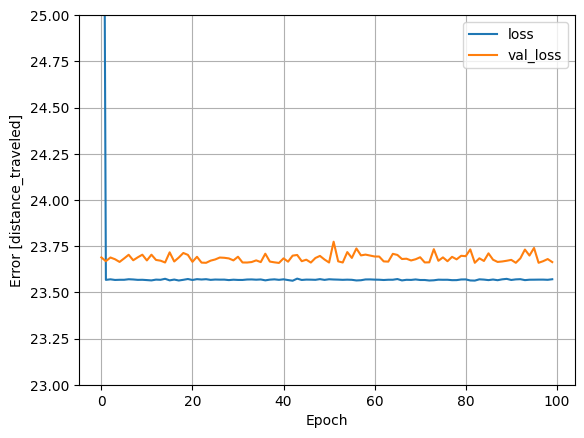

In [131]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([23, 25])
    plt.xlabel('Epoch')
    plt.ylabel('Error [distance_traveled]')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [133]:
# model evaluation
single_feature_model.evaluate(
    test_features[feature],
    test_target, verbose=1)

1306/1306 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - loss: 23.2853


23.2115535736084

In [141]:
def plot(feature, x=None, y=None):
    plt.figure(figsize=(10, 8))
    plt.scatter(train_features[feature], train_target, label='Data')
    if x is not None and y is not None:
        plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.legend()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


NameError: name 'target' is not defined

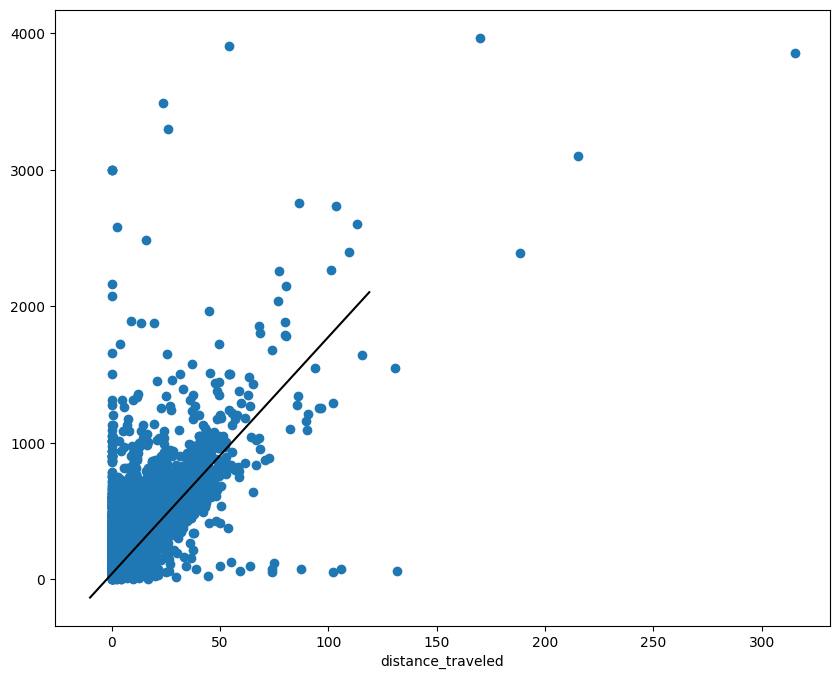

In [142]:
# predict and plot
range_min = np.min(test_features[feature]) - 10
range_max = np.max(test_features[feature]) + 10
x = tf.linspace(range_min, range_max, 200)
y = single_feature_model.predict(x)
    
plot(feature, x,y)

# DNN Model

In [138]:
dnn_model = keras.Sequential([
    single_feature_layer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'), 
    layers.Dense(1)
])

In [146]:
dnn_model.compile(loss=loss, 
                  optimizer=tf.keras.optimizers.Adam(0.01))

dnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_14                │ (None, 1)              │             3 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,356 (17.02 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 3 (16.00 B)

In [147]:
dnn_model.fit(
    train_features[feature], train_target,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
4179/4179 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 23.3579 - val_loss: 23.0809
Epoch 2/100
4179/4179 ━━━━━━━━━━━━━━━━━━━━ 4s 989us/step - loss: 23.1785 - val_loss: 23.1412
Epoch 3/100
4179/4179 ━━━━━━━━━━━━━━━━━━━━ 3s 768us/step - loss: 23.2609 - val_loss: 24.7928
Epoch 4/100
4179/4179 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 23.1399 - val_loss: 23.3589
Epoch 5/100
4179/4179 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 23.3492 - val_loss: 23.0224
Epoch 6/100
4179/4179 ━━━━━━━━━━━━━━━━━━━━ 4s 892us/step - loss: 23.1445 - val_loss: 23.1374
Epoch 7/100
4179/4179 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 23.1183 - val_loss: 23.4285
Epoch 8/100
4179/4179 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 23.1789 - val_loss: 23.1034
Epoch 9/100
4179/4179 ━━━━━━━━━━━━━━━━━━━━ 4s 897us/step - loss: 23.0200 - val_loss: 23.6681
Epoch 10/100
4179/4179 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 22.9889 - val_loss: 23.0416
Epoch 11/100
4179/4179 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 23.1880 - val_lo

In [148]:
dnn_model.evaluate(test_features[feature], test_target, verbose=1)

1306/1306 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step - loss: 22.5159


22.481935501098633

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


NameError: name 'target' is not defined

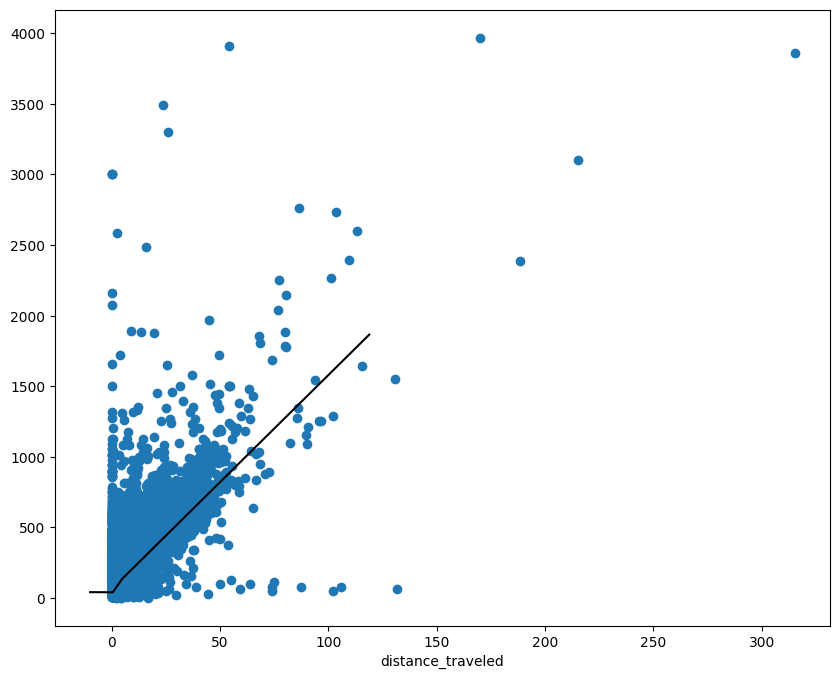

In [149]:
# predict and plot
x = tf.linspace(range_min, range_max, 200)
y = dnn_model.predict(x)

plot(feature, x,y)